
# Project: Investigating Hospital Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
<li>
    <a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#rq1">Research Question 1</a></li>
        <li><a href="#rq2">Research Question 2</a></li>
        <li><a href="#rq3">Research Question 3</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, i chose the [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments) dataset for analysis. This project is aimed at finding possible reasons for patients to miss their appointment at the hospital. This involves studing the relationship of different features (such as health issues, age, etc.) with patients' arrival at the appointed location. Generally, this project investigates the reasons for a patient to show up or not at an appointment.

> The data contains 110,527 rows of medical appointments along with 14 columns of attributes. From these attributes, `No-show` indicates whether the patient has showed up or not at the appointment. 
>
> **Note values of `No-show`**: _No_ is used to indicate the patient has showed up, and _Yes_ indicates the opposite. 
>
> `ScheduledDay` shows the datetime at which the appointment was made. `AppointmentDay` shows the datetime at which the patient is expected to show up. `Neighbourhood` shows the location at which the appointment will take place. `Scholarship` shows if the patient is receipent of a social welfare program aid. Columns such as `Hipertension`, `Diabetes`, and `Alcoholism` indicate whether or not the patient has these health issues. `Handcap` referes to the number of disabilities a patient have. Finally, `SMS_received` indicates whether the patients have received SMS notification about their appointment. 

> The questions raised for analyzing the data are:
* Are some _appointment days_ difficult for patients to _show up_?
* Are SMS _notified_ patients more likely to _show up_ on their appointment?
* Are patients with health care _scholarship_ more likely to _show up_ at their appointment?

In [1]:
# Import statement to load usefull packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The dataset is stored in the directory `Data`, and the code is located in `Code`. The directory structure looks like the following:
>
> ```
Project 2   
|--- Code
|    |--- Investigating_hospital_appointments.ipynb
|   
|--- Data
|    |--- no_show_data.csv
> ```

### General Properties
> In this section, properties such as: 
* the number of rows and columns, 
* missing and duplicate values,
* data type of columns
>
> were investigated after loading the dataset.

In [2]:
# Loading and inspecting the dataset. 
df = pd.read_csv('../Data/no_show_data.csv')

# Shape of the dataset
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

# Number of missing values in the dataset
print("Any missing value? {}.".format(df.isna().values.any()))

# Number of duplicated values in the dataset
print("Any duplicated record? {}.".format(df.duplicated().any()),'\n')

# Datatypes of the columns
print(df.dtypes, '\n')

The dataset has 110527 rows and 14 columns.
Any missing value? False.
Any duplicated record? False. 

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object 



> In this section, values of each column were investigated. The results are explained as follows:
* `Gender` is represented by values _F_ (female) and *M* (male),
* `ScheduledDay` is represented by **String** values formatted as `%Y-%m-%d %H:%M:%S`,
* `AppointmentDay` is represented by **String** values formatted as `%Y-%m-%d %H:%M:%S`,
* `Age` is represented by values between *-1* and _115_,
* `Neighbourhood` is represented by *81* different values,
* `Scholarship` is represented by values *0* (not receipent) and _1_ (aid receipent),
* `Hipertension` is represented by values *0* (no issue) and _1_ (has this health issue),
* `Diabetes` is represented by values *0* (no issue) and _1_ (has this health issue),
* `Alcoholism` is represented by values *0* (no issue) and _1_ (has this health issue),
* `Handcap` is represented by values **0, 1, 2, 3, and 4**,   
> **Note**: According to the [Dataset Creator](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356), these values represet the number of disabilities a patient has. _0_ means no disability; and **1, 2, 3, 4** represent one or more disabilities. 
* `SMS_received` is represented by values *0* (no SMS) and _1_ (SMS received),  
* Finally, `No-show` is represented by values *No* (showed up) and _Yes_ (did not showed up).  

In [3]:
# Values of each column
print("The column `Gender` contains values {}.".format(df['Gender'].unique()))
print("The column `ScheduledDay` contains {} values formatted as {}.".
      format(type(df['ScheduledDay'].iloc[0]), df['ScheduledDay'].iloc[0]))
print("The column `AppointmentDay` contains {} values formatted as {}.".
      format(type(df['AppointmentDay'].iloc[0]), df['AppointmentDay'].iloc[0]))
print("The column `Age` contains values from {} to {}.".
      format(df['Age'].min(), df['Age'].max()))
print("The column `Neighbourhood` contains {} unique values.".
      format(df['Neighbourhood'].nunique()))
print("The column `Scholarship` contains values {}.".format(df['Scholarship'].unique()))
print("The column `Hipertension` contains values {}.".format(df['Hipertension'].unique()))
print("The column `Diabetes` contains values {}.".format(df['Diabetes'].unique()))
print("The column `Alcoholism` contains values {}.".format(df['Alcoholism'].unique()))
print("The column `Handcap` contains values {}.".format(df['Handcap'].unique()))
print("The column `SMS_received` contains values {}.".format(df['SMS_received'].unique()))
print("The column `No-show` contains values {}.".format(df['No-show'].unique()))

The column `Gender` contains values ['F' 'M'].
The column `ScheduledDay` contains <class 'str'> values formatted as 2016-04-29T18:38:08Z.
The column `AppointmentDay` contains <class 'str'> values formatted as 2016-04-29T00:00:00Z.
The column `Age` contains values from -1 to 115.
The column `Neighbourhood` contains 81 unique values.
The column `Scholarship` contains values [0 1].
The column `Hipertension` contains values [1 0].
The column `Diabetes` contains values [0 1].
The column `Alcoholism` contains values [0 1].
The column `Handcap` contains values [0 1 2 3 4].
The column `SMS_received` contains values [0 1].
The column `No-show` contains values ['No' 'Yes'].


### Data Cleaning

> The dataset stored `ScheduledDay`s and `AppointmentDay`s in the form of **String** objects. However; converting these columns to hold **datetime** values will allow datetime related manipulations.
>
> The dataset contain a row with `Age` equal to **-1**. Since there is only one record with the condition `Age == -1`, it is **dropped** from the dataset.   
**Note**: According to the [Dataset Creator](https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457#238035), patiens with this condition are __babies not born yet__. However; these could be recorded as `Age == 0`. Furthermore; how could there be only 1 unborn patient from 110,527 records?
>
> The dataset also contain rows with `Handcap` **grater than 1**. Since all of these values (2, 3, and 4) are refering to patients with the specified number of disabilities, it is certain that these patients are disabled. Hence; `Handcap` column for these records can be **replaced by 1**.
>
> Finally; since values of `No-show` column are ambiguous, they need to be replaced. Currently; **No** means the **patient has showed up** and **Yes** means the **patient has missed the appointment**. Hence; the column name should be renamed to `showed_up`; and **values should be replaced by their opposite**.

> In this section, 
* Datatype of `ScheduledDay` and `AppointmentDay` columns are converted from **String** to **Datetime**,
* Values satisfying the condition `Age == -1` are dropped,
* `Handcap` values **2, 3, and 4** are replaced by value **1**,
* `No-show` values **(No, Yes)** are replaced by **(Yes, No)** respectively,
* Finally, column names are renamed to be lowercase, and `_` separated.

In [4]:
# Convert datatype of ScheduledDay and AppointmentDay to Datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], infer_datetime_format=True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], infer_datetime_format=True)

# Drop rows that met the condition Age == -1
df.drop(df[df['Age'] == -1].index, inplace=True)

# Replace the Handcap values 2, 3, and 4 by 1
df['Handcap'].replace([2, 3, 4], 1, inplace=True)

# Replace the No-show values No->Yes and Yes->No
df['No-show'].replace(['No', 'Yes'], ['Yes', 'No'], inplace=True)

# Renaming columns
new_column_names = {'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 
                    'Gender': 'gender', 'ScheduledDay': 'scheduled_day', 
                    'AppointmentDay': 'appointment_day', 'Age': 'age', 
                    'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 
                    'Hipertension': 'hipertension', 'Diabetes': 'diabetes', 
                    'Alcoholism': 'alcoholism', 'Handcap': 'handcap', 
                    'SMS_received': 'sms_received', 'No-show': 'showed_up'}
df.rename(columns= new_column_names, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='rq1'></a>
### Research Question 1 (Are some _appointment days_ difficult for patients to _show up_?)

#### Which days of the week are most appointments scheduled on?

In [5]:
# Get a copy of the data
df_1 = df.copy()

# Get day of the week from the appointment day
df_1['day_of_week'] = df_1['appointment_day'].dt.dayofweek

# Calculate proportion of appointments on each day of the week
daily_appointment_prop = df_1.groupby('day_of_week')['patient_id'].count()/df_1.shape[0]
daily_appointment_prop.name = 'Appointments'

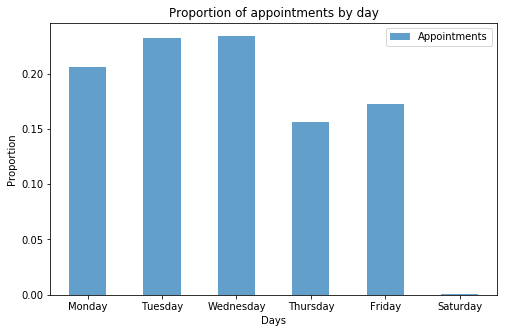

In [6]:
# Plot their proportion
xlabel_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_appointment_prop.plot(kind='bar', alpha=0.70, legend=True, figsize=(8, 5))
plt.title('Proportion of appointments by day')
plt.ylabel('Proportion')
plt.xlabel('Days')
plt.xticks(daily_appointment_prop.index, xlabel_days, rotation=0)
plt.show();

> From the above plot, around **20.6%**, **23.2%**, **23.4%**, **15.6%**, **17.2%**, **0.04%** of the patients were scheduled on days of the week respectively (Monday - Saturday).    
> Hence; most of the appointments were scheduled on `Tuesday` and `Wednesday`. And few appointments were scheduled on `Saturday`.    

#### How many did show up on each days of the week?

In [7]:
# Get data for each days of the week
monday = df_1.query('day_of_week == 0')
tuesday = df_1.query('day_of_week == 1')
wednesday = df_1.query('day_of_week == 2')
thursday = df_1.query('day_of_week == 3')
friday = df_1.query('day_of_week == 4')
saturday = df_1.query('day_of_week == 5')

# Calculate proportion of patients that attended or missed their appointments
#  at each days of the week
monday_showup_count = monday.groupby('showed_up')['patient_id'].count()
tuesday_showup_count = tuesday.groupby('showed_up')['patient_id'].count()
wednesday_showup_count = wednesday.groupby('showed_up')['patient_id'].count()
thursday_showup_count = thursday.groupby('showed_up')['patient_id'].count()
friday_showup_count = friday.groupby('showed_up')['patient_id'].count()
saturday_showup_count = saturday.groupby('showed_up')['patient_id'].count()
monday_proportion = monday_showup_count/monday_showup_count.sum()
tuesday_proportion = tuesday_showup_count/tuesday_showup_count.sum()
wednesday_proportion = wednesday_showup_count/wednesday_showup_count.sum()
thursday_proportion = thursday_showup_count/thursday_showup_count.sum()
friday_proportion = friday_showup_count/friday_showup_count.sum()
saturday_proportion = saturday_showup_count/saturday_showup_count.sum()

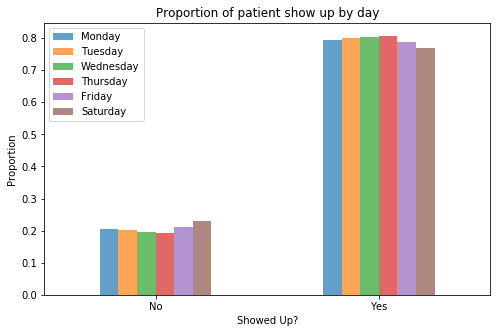

In [8]:
# Create a dataframe containing all proportions together
daywise_showup_proportion_df = pd.DataFrame({'Monday': monday_proportion, 
                                       'Tuesday': tuesday_proportion,
                                       'Wednesday': wednesday_proportion, 
                                       'Thursday': thursday_proportion,
                                       'Friday': friday_proportion, 
                                       'Saturday':saturday_proportion})

# Plot proportion of showing up for each day
daywise_showup_proportion_df.plot(kind='bar', alpha=0.70, legend = True, figsize=(8, 5))
plt.title('Proportion of patient show up by day')
plt.ylabel('Proportion')
plt.xlabel('Showed Up?')
plt.xticks(rotation=0)
plt.show();

> From the above plot, around **79.35%**, **79.9%**, **80.3%**, **80.6%**, **78.77%**, and **76.92%** of the scheduled patients showed up on each days of the week respectively.    
> Hence; the last two days of the week (`Friday` and `Saturday`) have the lowest show up percentage. But, what could **possibly influence** the low show up rate in the last two days of the week?

#### Gender - Is the low show up on the last two days, related to a certain gender?

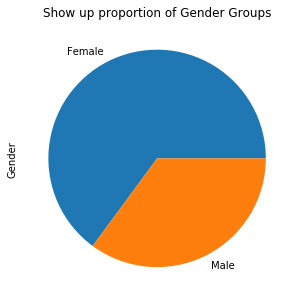

In [9]:
# Calculate proprtion of each gender for those who showed up
showed_up = df_1.query('showed_up == "Yes"')
showedup_gender_count = showed_up.groupby('gender')['patient_id'].count()
showedup_gender_prop = showedup_gender_count/showedup_gender_count.sum()
showedup_gender_prop.rename(index = {'F': 'Female', 'M': 'Male'}, inplace=True)
showedup_gender_prop.name = 'Gender'

# Plot proportion of gender groups in showing up
showedup_gender_prop.plot(kind='pie', figsize=(8,5))
plt.title('Show up proportion of Gender Groups')
plt.show();

> From the above plot, around **64.90%** of the patients who showed up were `Female`. And, only **35.10%** were `Male`s. Hence; if gender is correlated to showing up, then a decrease in the proportion of `Female`s should lower the percentage of showing up.    
> We know that percentage of showing up decreased in the last two days, so proportion of `Female`s should also decrease.

In [10]:
# Calculate proportion of patients that attended or missed their appointments
#  at each days of the week
monday_gender_count = monday.groupby('gender')['patient_id'].count()
tuesday_gender_count = tuesday.groupby('gender')['patient_id'].count()
wednesday_gender_count = wednesday.groupby('gender')['patient_id'].count()
thursday_gender_count = thursday.groupby('gender')['patient_id'].count()
friday_gender_count = friday.groupby('gender')['patient_id'].count()
saturday_gender_count = saturday.groupby('gender')['patient_id'].count()
monday_gender_proportion = monday_gender_count/monday_gender_count.sum()
tuesday_gender_proportion = tuesday_gender_count/tuesday_gender_count.sum()
wednesday_gender_proportion = wednesday_gender_count/wednesday_gender_count.sum()
thursday_gender_proportion = thursday_gender_count/thursday_gender_count.sum()
friday_gender_proportion = friday_gender_count/friday_gender_count.sum()
saturday_gender_proportion = saturday_gender_count/saturday_gender_count.sum()

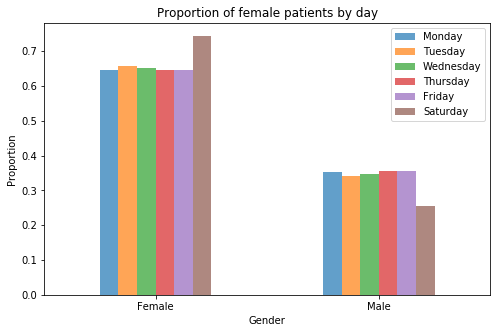

In [11]:
# Create a dataframe containing all the female proportions together
daywise_gender_proportion_df = pd.DataFrame({'Monday': monday_gender_proportion, 
                                       'Tuesday': tuesday_gender_proportion,
                                       'Wednesday': wednesday_gender_proportion, 
                                       'Thursday': thursday_gender_proportion,
                                       'Friday': friday_gender_proportion, 
                                       'Saturday':saturday_gender_proportion})
daywise_gender_proportion_df.rename(index = {'F': 'Female', 'M': 'Male'}, inplace = True)

# Plot proportion of showing up for each day
daywise_gender_proportion_df.plot(kind='bar', alpha=0.70, legend = True, figsize=(8, 5))
plt.title('Proportion of female patients by day')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show();

> From the above plot, the proportion of `Female`s was relatively similar across the week days until `Friday`. It even increased on `Saturday`, which was the opposite of what is expected.    
> Hence; the decrease in the percentage of showing up on the last two days, seem to have nothing to do with gender proportion.   

<a id="rq1_age"></a>
#### Age - Could age be related to the low show up rate in the last two days of the week?

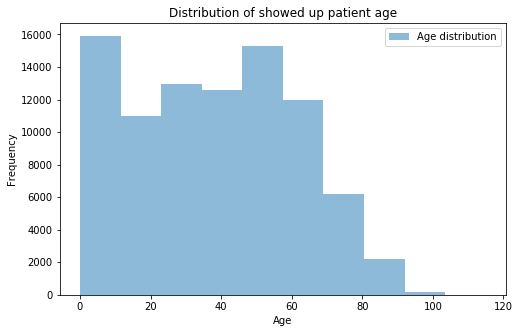

In [12]:
# Plot the distribution of age for those who showed up
showedup_ages = showed_up['age']
showedup_ages.name = 'Age distribution'
showedup_ages.plot(kind='hist', alpha=0.5, figsize=(8,5))
plt.legend()
plt.title('Distribution of showed up patient age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show();

> As of the above histogram, the number of patients between age (0-10) and (45-60) are high. And, the number of patients above 60 keeps getting low. Hence; `Age`s that are in each of these ranges can be grouped together, and the range in between can be divided in to three. These age classes are described below:
* `Child` represent ages between 0 and 14,
* `Youth` represent ages between 15 and 24,
* `Adult(25-44)` represent ages between 25 and 44,
* `Adult(45-59)` represent ages between 25 and 59,
* `Old` represent ages starting from 60 and above.

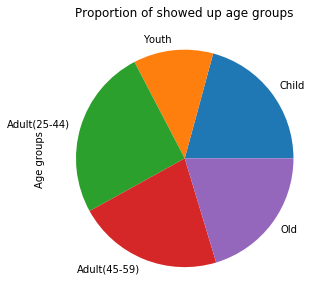

In [13]:
# Create bins from patient age
age_groups = [-1, 14, 24, 44, 59, 115]
age_labels = ['Child', 'Youth', 'Adult(25-44)', 'Adult(45-59)', 'Old']
patient_age_groups = pd.cut(df_1['age'], bins = age_groups, labels = age_labels)
df_1.loc[:, 'age_groups'] = patient_age_groups
showed_up = df_1.query('showed_up == "Yes"')
showedup_age_groups_count = showed_up.groupby('age_groups')['patient_id'].count()
showedup_age_groups_proportion = showedup_age_groups_count/showedup_age_groups_count.sum() 
showedup_age_groups_proportion.name = 'Age groups'

# Plot proportion of showing up for each day
showedup_age_groups_proportion.plot(kind='pie', figsize=(8,5))
plt.title('Proportion of showed up age groups')
plt.show();

> From the above plot, around **25.4%** of the patients who showed up were `Adult(25-44)`. **21.6%** and **20.8%** were `Adult(45-59)` and `Child` respectively. Hence; if age group is correlated to showing up, then a decrease in the proportion of `Adult(25-44)`, `Adult(45-59)`, or `Child` should lower the percentage of showing up.    
> We know that percentage of showing up decreased in the last two days, so proportion of `Adult(25-44)`, `Adult(45-59)`, or `Child` should also decrease.

In [14]:
# Get data for each days of the week
monday = df_1.query('day_of_week == 0')
tuesday = df_1.query('day_of_week == 1')
wednesday = df_1.query('day_of_week == 2')
thursday = df_1.query('day_of_week == 3')
friday = df_1.query('day_of_week == 4')
saturday = df_1.query('day_of_week == 5')

# Calculate proportion of age groups at each days of the week
monday_age_groups_count = monday.groupby('age_groups')['patient_id'].count()
tuesday_age_groups_count = tuesday.groupby('age_groups')['patient_id'].count()
wednesday_age_groups_count = wednesday.groupby('age_groups')['patient_id'].count()
thursday_age_groups_count = thursday.groupby('age_groups')['patient_id'].count()
friday_age_groups_count = friday.groupby('age_groups')['patient_id'].count()
saturday_age_groups_count = saturday.groupby('age_groups')['patient_id'].count()
monday_age_groups_proportion = monday_age_groups_count/monday_age_groups_count.sum()
tuesday_age_groups_proportion = tuesday_age_groups_count/tuesday_age_groups_count.sum()
wednesday_age_groups_proportion = wednesday_age_groups_count/wednesday_age_groups_count.sum()
thursday_age_groups_proportion = thursday_age_groups_count/thursday_age_groups_count.sum()
friday_age_groups_proportion = friday_age_groups_count/friday_age_groups_count.sum()
saturday_age_groups_proportion = saturday_age_groups_count/saturday_age_groups_count.sum()

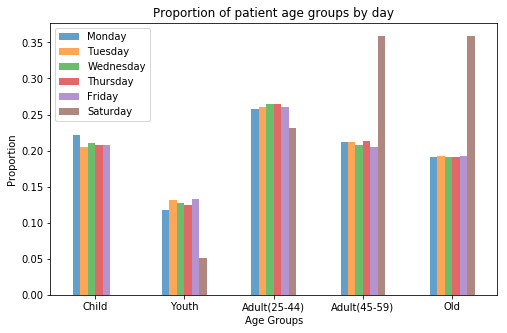

In [15]:
# Create a dataframe containing all proportions together
daywise_age_groups_proportion_df = pd.DataFrame({'Monday': monday_age_groups_proportion, 
                                       'Tuesday': tuesday_age_groups_proportion,
                                       'Wednesday': wednesday_age_groups_proportion, 
                                       'Thursday': thursday_age_groups_proportion,
                                       'Friday': friday_age_groups_proportion, 
                                       'Saturday':saturday_age_groups_proportion})

# Plot proportion of showing up for each day
daywise_age_groups_proportion_df.plot(kind='bar', alpha=0.70, legend = True, figsize=(8, 5))
plt.title('Proportion of patient age groups by day')
plt.ylabel('Proportion')
plt.xlabel('Age Groups')
plt.xticks(rotation=0)
plt.show();

> From the above plot, the proportion of `Child`s, `Youth`s, and `Adult(25-44)`s were relatively similar across the week days until `Friday`. And on `Saturday` their proportions were very low, which has the potential to influence showing up percentage. However; no significant change was observed on `Friday` at each age group. Additionally, the number of appointments on `Saturday` were only **39**, which makes it difficult to make generalization with such small number of data.     
> Hence; the decrease in the percentage of showing up on the last two days, seem to have little or nothing to do with a certain age group. 

#### SMS - Could SMS be related to the low show up rate in the last two days of the week?


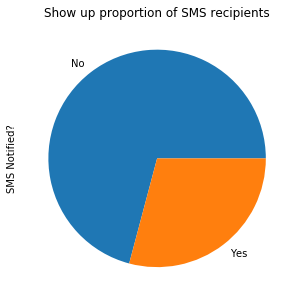

In [16]:
# Calculate proprtion of SMS recipients from those who showed up
showedup_sms_received_count = showed_up.groupby('sms_received')['patient_id'].count()
showedup_sms_received_prop = showedup_sms_received_count/showedup_sms_received_count.sum()
showedup_sms_received_prop.rename(index = {0: 'No', 1: 'Yes'}, inplace=True)
showedup_sms_received_prop.name = 'SMS Notified?'

# Plot proportion of gender groups in showing up
showedup_sms_received_prop.plot(kind='pie', figsize=(8,5))
plt.title('Show up proportion of SMS recipients')
plt.show();

> From the above plot, around **70.87%** of the patients who showed up did not receive SMS. And, only **29.13%** were able to receive SMS notification. Hence; if receiving SMS notification is correlated to showing up, then a decrease in the proportion of SMS receivers should lower the percentage of showing up.    
> We know that percentage of showing up decreased in the last two days, so proportion of SMS receivers should also decrease.

In [17]:
# Calculate proportion of patients that received SMS on each days of the week
monday_sms_received_count = monday.groupby('sms_received')['patient_id'].count()
tuesday_sms_received_count = tuesday.groupby('sms_received')['patient_id'].count()
wednesday_sms_received_count = wednesday.groupby('sms_received')['patient_id'].count()
thursday_sms_received_count = thursday.groupby('sms_received')['patient_id'].count()
friday_sms_received_count = friday.groupby('sms_received')['patient_id'].count()
saturday_sms_received_count = saturday.groupby('sms_received')['patient_id'].count()
monday_sms_received_proportion = monday_sms_received_count/monday_sms_received_count.sum()
tuesday_sms_received_proportion = tuesday_sms_received_count/tuesday_sms_received_count.sum()
wednesday_sms_received_proportion = wednesday_sms_received_count/wednesday_sms_received_count.sum()
thursday_sms_received_proportion = thursday_sms_received_count/thursday_sms_received_count.sum()
friday_sms_received_proportion = friday_sms_received_count/friday_sms_received_count.sum()
saturday_sms_received_proportion = saturday_sms_received_count/saturday_sms_received_count.sum()

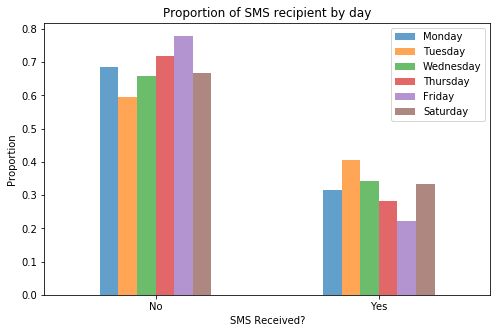

In [18]:
# Create a dataframe containing all the SMS proportions together
daywise_sms_received_proportion_df = pd.DataFrame({
    'Monday': monday_sms_received_proportion, 
    'Tuesday': tuesday_sms_received_proportion,
    'Wednesday': wednesday_sms_received_proportion,
    'Thursday': thursday_sms_received_proportion,
    'Friday': friday_sms_received_proportion,
    'Saturday':saturday_sms_received_proportion})
daywise_sms_received_proportion_df.rename(index = {0: 'No', 1: 'Yes'}, inplace = True)

# Plot proportion of SMS notifications for each day
daywise_sms_received_proportion_df.plot(kind='bar', alpha=0.70, legend = True, figsize=(8, 5))
plt.title('Proportion of SMS recipient by day')
plt.ylabel('Proportion')
plt.xlabel('SMS Received?')
plt.xticks(rotation=0)
plt.show();

> As of the above plot; patients who received SMS on `Friday` were **22.14%**, which is lower than all the days before. However; an increase on the percentage of SMS receivers was observed on `Saturday`. This increase could be due to the small number of patient data on `Saturday`.    
> Hence; the percentage decrease in show up could potentialy be due to the lower number of SMS notifications in the second half of the week days.    
**Note**: these generalizations do not consider `Neighbourhood`, or `Scholarship` related informations.

<a id='rq2'></a>
### Research Question 2  (Are SMS _notified_ patients more likely to _show up_ on their appointment?)

#### What is percentage of showing up with or without SMS?

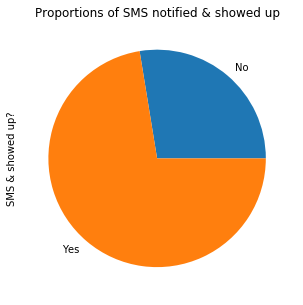

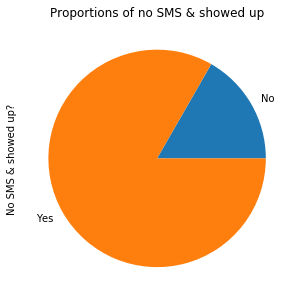

In [19]:
# Calculate show up proportion of patients notified by SMS
sms_received = df_1.query('sms_received == 1')
no_sms_received = df_1.query('sms_received == 0')
sms_received_showedup_count = sms_received.groupby('showed_up')['patient_id'].count()
no_sms_received_showedup_count = no_sms_received.groupby('showed_up')['patient_id'].count()
sms_received_showedup_proportion = sms_received_showedup_count/sms_received_showedup_count.sum()
no_sms_received_showedup_proportion = no_sms_received_showedup_count/no_sms_received_showedup_count.sum()
sms_received_showedup_proportion.name = 'SMS & showed up?'
no_sms_received_showedup_proportion.name = 'No SMS & showed up?'

# Plot the proportion
sms_received_showedup_proportion.plot(kind='pie', figsize=(8, 5))
plt.title('Proportions of SMS notified & showed up')
plt.show();
no_sms_received_showedup_proportion.plot(kind='pie', figsize=(8, 5))
plt.title('Proportions of no SMS & showed up')
plt.show();

> As the above graphs show, around **72.43%** of the SMS notified patients showed up at their appointment. And, around **83.30%** of the patients that did not receive SMS notification showed up. Hence; patients notified through SMS seem to be less likely to show up than those who did not get notified. However; does this hold if **other factors** such as age, any health issue, or disability are considered?

#### Age - Are patients with no SMS notification more likely to show up than those who received SMS? Considering different age groups?

> Age groups used for the <a href="#rq1_age">research question 1</a> are applied here.

In [20]:
# Get each age group of patients
child_sms_received = sms_received.query('age_groups == "Child"')
youth_sms_received = sms_received.query('age_groups == "Youth"')
adult_25_44_sms_received = sms_received.query('age_groups == "Adult(25-44)"')
adult_45_59_sms_received = sms_received.query('age_groups == "Adult(45-59)"')
old_sms_received = sms_received.query('age_groups == "Old"')

child_no_sms_received = no_sms_received.query('age_groups == "Child"')
youth_no_sms_received = no_sms_received.query('age_groups == "Youth"')
adult_25_44_no_sms_received = no_sms_received.query('age_groups == "Adult(25-44)"')
adult_45_59_no_sms_received = no_sms_received.query('age_groups == "Adult(45-59)"')
old_no_sms_received = no_sms_received.query('age_groups == "Old"')

# Count patients who showed up for each age group
child_sms_showup_count = child_sms_received.groupby('showed_up')['patient_id'].count()
youth_sms_showup_count = youth_sms_received.groupby('showed_up')['patient_id'].count()
adult_25_44_sms_showup_count = adult_25_44_sms_received.groupby('showed_up')['patient_id'].count()
adult_45_59_sms_showup_count = adult_45_59_sms_received.groupby('showed_up')['patient_id'].count()
old_sms_showup_count = old_sms_received.groupby('showed_up')['patient_id'].count()

child_no_sms_showup_count = child_no_sms_received.groupby('showed_up')['patient_id'].count()
youth_no_sms_showup_count = youth_no_sms_received.groupby('showed_up')['patient_id'].count()
adult_25_44_no_sms_showup_count = adult_25_44_no_sms_received.groupby('showed_up')['patient_id'].count()
adult_45_59_no_sms_showup_count = adult_45_59_no_sms_received.groupby('showed_up')['patient_id'].count()
old_no_sms_showup_count = old_no_sms_received.groupby('showed_up')['patient_id'].count()

# Calculate proportion of patients who showed up for each age group
child_sms_showup_proportion = child_sms_showup_count/child_sms_showup_count.sum()
youth_sms_showup_proportion = youth_sms_showup_count/youth_sms_showup_count.sum()
adult_25_44_sms_showup_proportion = adult_25_44_sms_showup_count/adult_25_44_sms_showup_count.sum()
adult_45_59_sms_showup_proportion = adult_45_59_sms_showup_count/adult_45_59_sms_showup_count.sum()
old_sms_showup_proportion = old_sms_showup_count/old_sms_showup_count.sum()

child_no_sms_showup_proportion = child_no_sms_showup_count/child_no_sms_showup_count.sum()
youth_no_sms_showup_proportion = youth_no_sms_showup_count/youth_no_sms_showup_count.sum()
adult_25_44_no_sms_showup_proportion = adult_25_44_no_sms_showup_count/adult_25_44_no_sms_showup_count.sum()
adult_45_59_no_sms_showup_proportion = adult_45_59_no_sms_showup_count/adult_45_59_no_sms_showup_count.sum()
old_no_sms_showup_proportion = old_no_sms_showup_count/old_no_sms_showup_count.sum()

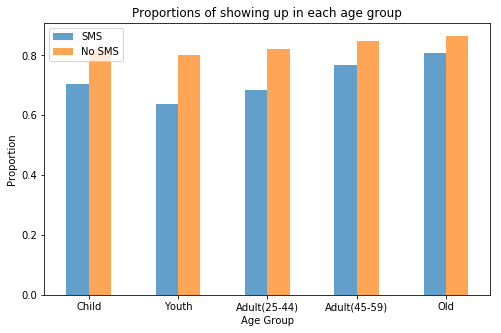

In [21]:
# Create a dataframe containing both proportions together
sms_age_group_showup_proportion_df = pd.DataFrame({
    'SMS': [child_sms_showup_proportion['Yes'], youth_sms_showup_proportion['Yes'],
            adult_25_44_sms_showup_proportion['Yes'], adult_45_59_sms_showup_proportion['Yes'],
            old_sms_showup_proportion['Yes']],
    'No SMS': [child_no_sms_showup_proportion['Yes'], youth_no_sms_showup_proportion['Yes'],
               adult_25_44_no_sms_showup_proportion['Yes'], adult_45_59_no_sms_showup_proportion['Yes'],
               old_no_sms_showup_proportion['Yes']]}, 
    index=['Child', 'Youth', 'Adult(25-44)', 'Adult(45-59)', 'Old'])

# Plot the proportion
sms_age_group_showup_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8, 5))
plt.legend()
plt.title('Proportions of showing up in each age group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show();

> As of the above graph; patients who did not receive SMS notifications seem to have higher show up percentage. Furthermore; the trend in the above graph shows that, as (SMS notified) patients' age increases so does the show up percentage. However; as of the above plot, `Youth` patients who received SMS notifications, tend to have low show up percentage. Hence; patients notified through SMS seem to be less likely to show up than those who did not get notified.   
But, what if the patients have **other health issues**?

#### Health Issues - Are patients with no health issue more likely to show up than those having health issue in the same age group?

In [22]:
# Get patients with health issue for each age group
child_sms_health_issue = child_sms_received.query(
    'hipertension == 1 | diabetes == 1 | alcoholism == 1 | handcap == 1')
youth_sms_health_issue = youth_sms_received.query(
    'hipertension == 1 | diabetes == 1 | alcoholism == 1 | handcap == 1')
adult_25_44_sms_health_issue = adult_25_44_sms_received.query(
    'hipertension == 1 | diabetes == 1 | alcoholism == 1 | handcap == 1')
adult_45_59_sms_health_issue = adult_45_59_sms_received.query(
    'hipertension == 1 | diabetes == 1 | alcoholism == 1 | handcap == 1')
old_sms_health_issue = old_sms_received.query(
    'hipertension == 1 | diabetes == 1 | alcoholism == 1 | handcap == 1')

child_sms_no_health_issue = child_sms_received.query(
    'hipertension == 0 & diabetes == 0 & alcoholism == 0 & handcap == 0')
youth_sms_no_health_issue = youth_sms_received.query(
    'hipertension == 0 & diabetes == 0 & alcoholism == 0 & handcap == 0')
adult_25_44_sms_no_health_issue = adult_25_44_sms_received.query(
    'hipertension == 0 & diabetes == 0 & alcoholism == 0 & handcap == 0')
adult_45_59_sms_no_health_issue = adult_45_59_sms_received.query(
    'hipertension == 0 & diabetes == 0 & alcoholism == 0 & handcap == 0')
old_sms_no_health_issue = old_sms_received.query(
    'hipertension == 0 & diabetes == 0 & alcoholism == 0 & handcap == 0')

# Count patients who showed up for each age group
child_sms_health_issue_showup_count = child_sms_health_issue.groupby('showed_up')['patient_id'].count()
youth_sms_health_issue_showup_count = youth_sms_health_issue.groupby('showed_up')['patient_id'].count()
adult_25_44_sms_health_issue_showup_count = adult_25_44_sms_health_issue.groupby('showed_up')['patient_id'].count()
adult_45_59_sms_health_issue_showup_count = adult_45_59_sms_health_issue.groupby('showed_up')['patient_id'].count()
old_sms_health_issue_showup_count = old_sms_health_issue.groupby('showed_up')['patient_id'].count()

child_sms_no_health_issue_showup_count = child_sms_no_health_issue.groupby('showed_up')['patient_id'].count()
youth_sms_no_health_issue_showup_count = youth_sms_no_health_issue.groupby('showed_up')['patient_id'].count()
adult_25_44_sms_no_health_issue_showup_count = adult_25_44_sms_no_health_issue.groupby('showed_up')['patient_id'].count()
adult_45_59_sms_no_health_issue_showup_count = adult_45_59_sms_no_health_issue.groupby('showed_up')['patient_id'].count()
old_sms_no_health_issue_showup_count = old_sms_no_health_issue.groupby('showed_up')['patient_id'].count()

# Calculate proportion of patients who showed up for each age group
child_sms_health_showup_proportion = child_sms_health_issue_showup_count/child_sms_health_issue_showup_count.sum()
youth_sms_health_showup_proportion = youth_sms_health_issue_showup_count/youth_sms_health_issue_showup_count.sum()
adult_25_44_sms_health_showup_proportion = adult_25_44_sms_health_issue_showup_count/adult_25_44_sms_health_issue_showup_count.sum()
adult_45_59_sms_health_showup_proportion = adult_45_59_sms_health_issue_showup_count/adult_45_59_sms_health_issue_showup_count.sum()
old_sms_health_showup_proportion = old_sms_health_issue_showup_count/old_sms_health_issue_showup_count.sum()

child_sms_no_health_issue_showup_proportion = child_sms_no_health_issue_showup_count/child_sms_no_health_issue_showup_count.sum()
youth_sms_no_health_issue_showup_proportion = youth_sms_no_health_issue_showup_count/youth_sms_no_health_issue_showup_count.sum()
adult_25_44_sms_no_health_issue_showup_proportion = adult_25_44_sms_no_health_issue_showup_count/adult_25_44_sms_no_health_issue_showup_count.sum()
adult_45_59_sms_no_health_issue_showup_proportion = adult_45_59_sms_no_health_issue_showup_count/adult_45_59_sms_no_health_issue_showup_count.sum()
old_sms_no_health_issue_showup_proportion = old_sms_no_health_issue_showup_count/old_sms_no_health_issue_showup_count.sum()

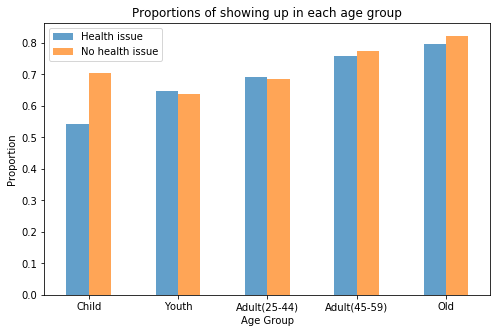

In [23]:
# Create a dataframe containing both proportions together
sms_age_group_health_showup_proportion_df = pd.DataFrame({
    'Health issue': [child_sms_health_showup_proportion['Yes'], youth_sms_health_showup_proportion['Yes'],
            adult_25_44_sms_health_showup_proportion['Yes'], adult_45_59_sms_health_showup_proportion['Yes'],
            old_sms_health_showup_proportion['Yes']],
    'No health issue': [child_sms_no_health_issue_showup_proportion['Yes'], youth_sms_no_health_issue_showup_proportion['Yes'],
               adult_25_44_sms_no_health_issue_showup_proportion['Yes'], adult_45_59_sms_no_health_issue_showup_proportion['Yes'],
               old_sms_no_health_issue_showup_proportion['Yes']]}, 
    index=['Child', 'Youth', 'Adult(25-44)', 'Adult(45-59)', 'Old'])

# Plot the proportion
sms_age_group_health_showup_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8, 5))
plt.legend()
plt.title('Proportions of showing up in each age group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show();

> As of the above graph; patients who received SMS notification and are in the same age group may have different showing up percentage as a result of health issue. `Youth` and `Adult(25-44)` with health issue have higher percentage of showing up than those with no health issue.   
> Hence; patients classified as `Youth`, and `Adult(25-44)` are more likely to **show up at their appointment even if they have health issue**. Furthermore; the trend in the above graph shows that, as patients'(with health issue) age increases so does the show up percentage. However; as of the above plot, `Youth` patients with no additional health issue tend to have low show up percentage.   
**Note**: this is only if the patients have received SMS. 

<a id='rq3'></a>
### Research Question 3  (Are patients with _scholarship_ more likely to _show up_ at their appointment?)

#### What is the percentage of showing up with or without healthcare scholarship?

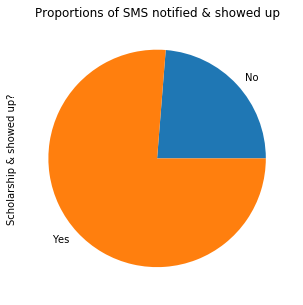

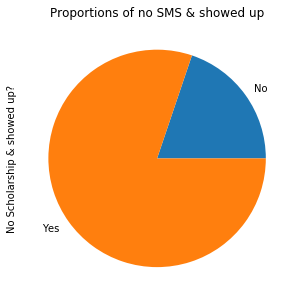

In [24]:
# Calculate show up proportion of patients notified by SMS
scholarship = df_1.query('scholarship == 1')
no_scholarship = df_1.query('scholarship == 0')
scholarship_showedup_count = scholarship.groupby('showed_up')['patient_id'].count()
no_scholarship_showedup_count = no_scholarship.groupby('showed_up')['patient_id'].count()
scholarship_showedup_proportion = scholarship_showedup_count/scholarship_showedup_count.sum()
no_scholarship_showedup_proportion = no_scholarship_showedup_count/no_scholarship_showedup_count.sum()
scholarship_showedup_proportion.name = 'Scholarship & showed up?'
no_scholarship_showedup_proportion.name = 'No Scholarship & showed up?'

# Plot the proportion
scholarship_showedup_proportion.plot(kind='pie', figsize=(8, 5))
plt.title('Proportions of SMS notified & showed up')
plt.show();
no_scholarship_showedup_proportion.plot(kind='pie', figsize=(8, 5))
plt.title('Proportions of no SMS & showed up')
plt.show();

> As the above graphs show, around **76.26%** of the scholarship recipients showed up at their appointment. And, around **80.19%** of the patients that did not receive scholarship showed up. Hence; patients with no scholarship seem to be more likely to show up than those who have a scholarship. However; does this hold if **other factors** such as age, any health issue, or disability are considered?

#### Age - Are patients with no scholarship more likely to show up than those who have a scholarship? Considering different age groups who received SMS.

> Ages groups used for the <a href="#rq1_age">research question 1</a> are applied here.

In [25]:
# Get each age group of patients
child_scholarship = scholarship.query('age_groups == "Child" & sms_received == 1')
youth_scholarship = scholarship.query('age_groups == "Youth" & sms_received == 1')
adult_25_44_scholarship = scholarship.query('age_groups == "Adult(25-44)" & sms_received == 1')
adult_45_59_scholarship = scholarship.query('age_groups == "Adult(45-59)" & sms_received == 1')
old_scholarship = scholarship.query('age_groups == "Old" & sms_received == 1')

child_no_scholarship = no_scholarship.query('age_groups == "Child" & sms_received == 1')
youth_no_scholarship = no_scholarship.query('age_groups == "Youth" & sms_received == 1')
adult_25_44_no_scholarship = no_scholarship.query('age_groups == "Adult(25-44)" & sms_received == 1')
adult_45_59_no_scholarship = no_scholarship.query('age_groups == "Adult(45-59)" & sms_received == 1')
old_no_scholarship = no_scholarship.query('age_groups == "Old" & sms_received == 1')

# Count patients who showed up for each age group
child_scholarship_showup_count = child_scholarship.groupby('showed_up')['patient_id'].count()
youth_scholarship_showup_count = youth_scholarship.groupby('showed_up')['patient_id'].count()
adult_25_44_scholarship_showup_count = adult_25_44_scholarship.groupby('showed_up')['patient_id'].count()
adult_45_59_scholarship_showup_count = adult_45_59_scholarship.groupby('showed_up')['patient_id'].count()
old_scholarship_showup_count = old_scholarship.groupby('showed_up')['patient_id'].count()

child_no_scholarship_showup_count = child_no_scholarship.groupby('showed_up')['patient_id'].count()
youth_no_scholarship_showup_count = youth_no_scholarship.groupby('showed_up')['patient_id'].count()
adult_25_44_no_scholarship_showup_count = adult_25_44_no_scholarship.groupby('showed_up')['patient_id'].count()
adult_45_59_no_scholarship_showup_count = adult_45_59_no_scholarship.groupby('showed_up')['patient_id'].count()
old_no_scholarship_showup_count = old_no_scholarship.groupby('showed_up')['patient_id'].count()

# Calculate proportion of patients who showed up for each age group
child_scholarship_showup_proportion = child_scholarship_showup_count/child_scholarship_showup_count.sum()
youth_scholarship_showup_proportion = youth_scholarship_showup_count/youth_scholarship_showup_count.sum()
adult_25_44_scholarship_showup_proportion = adult_25_44_scholarship_showup_count/adult_25_44_scholarship_showup_count.sum()
adult_45_59_scholarship_showup_proportion = adult_45_59_scholarship_showup_count/adult_45_59_scholarship_showup_count.sum()
old_scholarship_showup_proportion = old_scholarship_showup_count/old_scholarship_showup_count.sum()

child_no_scholarship_showup_proportion = child_no_scholarship_showup_count/child_no_scholarship_showup_count.sum()
youth_no_scholarship_showup_proportion = youth_no_scholarship_showup_count/youth_no_scholarship_showup_count.sum()
adult_25_44_no_scholarship_showup_proportion = adult_25_44_no_scholarship_showup_count/adult_25_44_no_scholarship_showup_count.sum()
adult_45_59_no_scholarship_showup_proportion = adult_45_59_no_scholarship_showup_count/adult_45_59_no_scholarship_showup_count.sum()
old_no_scholarship_showup_proportion = old_no_scholarship_showup_count/old_no_scholarship_showup_count.sum()

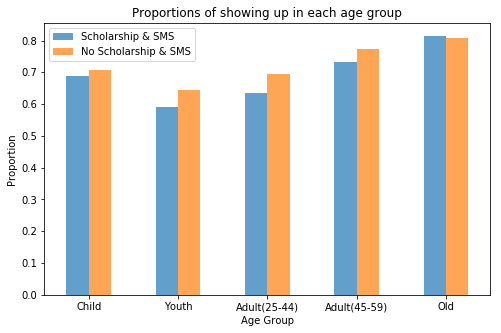

In [26]:
# Create a dataframe containing both proportions together
scholarship_age_group_showup_proportion_df = pd.DataFrame({
    'Scholarship & SMS': [child_scholarship_showup_proportion['Yes'], youth_scholarship_showup_proportion['Yes'],
            adult_25_44_scholarship_showup_proportion['Yes'], adult_45_59_scholarship_showup_proportion['Yes'],
            old_scholarship_showup_proportion['Yes']],
    'No Scholarship & SMS': [child_no_scholarship_showup_proportion['Yes'], youth_no_scholarship_showup_proportion['Yes'],
               adult_25_44_no_scholarship_showup_proportion['Yes'], adult_45_59_no_scholarship_showup_proportion['Yes'],
               old_no_scholarship_showup_proportion['Yes']]}, 
    index=['Child', 'Youth', 'Adult(25-44)', 'Adult(45-59)', 'Old'])

# Plot the proportion
scholarship_age_group_showup_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8, 5))
plt.legend()
plt.title('Proportions of showing up in each age group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show();

> As of the above graph; patients who did not have scholarship seem to have higher show up percentage. Furthermore; the trend in the above graph shows that, as (scholarship recipient) patients' age increases so does the show up percentage. However; as of the above plot, `Youth` patients who received a scholarship, tend to have low show up percentage; and `Old`er patients with scholarship seem to have higher chance showing up if notified through SMS. Hence; patients (under age of 60) with a scholarship seem to be less likely to show up than those who did not get a scholarship.   
But, what if the patients have **other health issues**?

#### Health Issues - Are patients with no health issue more likely to show up than those having a health issue? Considering different age groups who received SMS and scholarship.

In [27]:
# Get each age group of patients
child_no_health_issue_scholarship = child_sms_no_health_issue.query('scholarship == 1') 
youth_no_health_issue_scholarship = youth_sms_no_health_issue.query('scholarship == 1') 
adult_25_44_no_health_issue_scholarship = adult_25_44_sms_no_health_issue.query('scholarship == 1') 
adult_45_59_no_health_issue_scholarship = adult_45_59_sms_no_health_issue.query('scholarship == 1') 
old_no_health_issue_scholarship = old_sms_no_health_issue.query('scholarship == 1') 

child_health_issue_no_scholarship = child_sms_health_issue.query('scholarship == 0') 
youth_health_issue_no_scholarship = youth_sms_health_issue.query('scholarship == 0') 
adult_25_44_health_issue_no_scholarship = adult_25_44_sms_health_issue.query('scholarship == 0') 
adult_45_59_health_issue_no_scholarship = adult_45_59_sms_health_issue.query('scholarship == 0') 
old_health_issue_no_scholarship = old_sms_health_issue.query('scholarship == 0') 

# Count patients who showed up for each age group
child_scholarship_no_issue_showup_count = child_no_health_issue_scholarship.groupby('showed_up')['patient_id'].count()
youth_scholarship_no_issue_showup_count = youth_no_health_issue_scholarship.groupby('showed_up')['patient_id'].count()
adult_25_44_scholarship_no_issue_showup_count = adult_25_44_no_health_issue_scholarship.groupby('showed_up')['patient_id'].count()
adult_45_59_scholarship_no_issue_showup_count = adult_45_59_no_health_issue_scholarship.groupby('showed_up')['patient_id'].count()
old_scholarship_no_issue_showup_count = old_no_health_issue_scholarship.groupby('showed_up')['patient_id'].count()

child_no_scholarship_issue_showup_count = child_health_issue_no_scholarship.groupby('showed_up')['patient_id'].count()
youth_no_scholarship_issue_showup_count = youth_health_issue_no_scholarship.groupby('showed_up')['patient_id'].count()
adult_25_44_no_scholarship_issue_showup_count = adult_25_44_health_issue_no_scholarship.groupby('showed_up')['patient_id'].count()
adult_45_59_no_scholarship_issue_showup_count = adult_45_59_health_issue_no_scholarship.groupby('showed_up')['patient_id'].count()
old_no_scholarship_issue_showup_count = old_health_issue_no_scholarship.groupby('showed_up')['patient_id'].count()

# Calculate proportion of patients who showed up for each age group
child_scholarship_no_issue_showup_proportion = child_scholarship_no_issue_showup_count/child_scholarship_no_issue_showup_count.sum()
youth_scholarship_no_issue_showup_proportion = youth_scholarship_no_issue_showup_count/youth_scholarship_no_issue_showup_count.sum()
adult_25_44_scholarship_no_issue_showup_proportion = adult_25_44_scholarship_no_issue_showup_count/adult_25_44_scholarship_no_issue_showup_count.sum()
adult_45_59_scholarship_no_issue_showup_proportion = adult_45_59_scholarship_no_issue_showup_count/adult_45_59_scholarship_no_issue_showup_count.sum()
old_scholarship_no_issue_showup_proportion = old_scholarship_no_issue_showup_count/old_scholarship_no_issue_showup_count.sum()

child_no_scholarship_issue_showup_proportion = child_no_scholarship_issue_showup_count/child_no_scholarship_issue_showup_count.sum()
youth_no_scholarship_issue_showup_proportion = youth_no_scholarship_issue_showup_count/youth_no_scholarship_issue_showup_count.sum()
adult_25_44_no_scholarship_issue_showup_proportion = adult_25_44_no_scholarship_issue_showup_count/adult_25_44_no_scholarship_issue_showup_count.sum()
adult_45_59_no_scholarship_issue_showup_proportion = adult_45_59_no_scholarship_issue_showup_count/adult_45_59_no_scholarship_issue_showup_count.sum()
old_no_scholarship_issue_showup_proportion = old_no_scholarship_issue_showup_count/old_no_scholarship_issue_showup_count.sum()

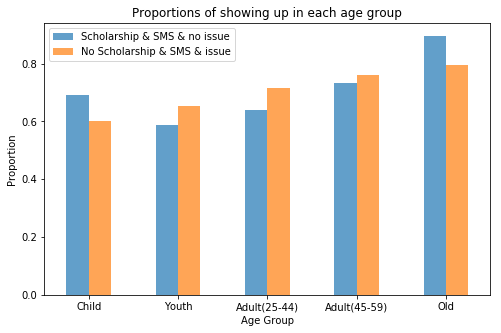

In [28]:
# Create a dataframe containing both proportions together
scholarship_age_group_issue_showup_proportion_df = pd.DataFrame({
    'Scholarship & SMS & no issue': [child_scholarship_no_issue_showup_proportion['Yes'], youth_scholarship_no_issue_showup_proportion['Yes'],
            adult_25_44_scholarship_no_issue_showup_proportion['Yes'], adult_45_59_scholarship_no_issue_showup_proportion['Yes'],
            old_scholarship_no_issue_showup_proportion['Yes']],
    'No Scholarship & SMS & issue': [child_no_scholarship_issue_showup_proportion['Yes'], youth_no_scholarship_issue_showup_proportion['Yes'],
               adult_25_44_no_scholarship_issue_showup_proportion['Yes'], adult_45_59_no_scholarship_issue_showup_proportion['Yes'],
               old_no_scholarship_issue_showup_proportion['Yes']]}, 
    index=['Child', 'Youth', 'Adult(25-44)', 'Adult(45-59)', 'Old'])

# Plot the proportion
scholarship_age_group_issue_showup_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8, 5))
plt.legend()
plt.title('Proportions of showing up in each age group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show();

> What is interesting from the above graph is; patients who did not have scholarship seem to have higher show up percentage. Furthermore; the trend in the above graph shows that, as (non scholarship) patients' age increases so does the show up percentage. As of the above plot; `Child` and `Old` patients who received a scholarship, tend to have high show up percentage. However; `Youth` and `Adult` patients with scholarship seem to have lower showing up percentage than those with no scholarship.    
Hence; `Child` and `Old` patients (who received SMS and had no health issue) are more likely to showup if they have a scholarship. However; `Youth` and `Adult` patients (who received SMS and had a health issue) are more likely to showup even if they have no scholarship.   

<a id='conclusions'></a>
## Conclusions
### Research Question 1 (Are some _appointment days_ difficult for patients to _show up_?)

> The chances of being scheduled on each days of the week (Monday - Saturday) are **20.6%**, **23.2%**, **23.4%**, **15.6%**, **17.2%**, and **0.04%** respectively. This means on average **22%** of the total appointments were made on  each of the days from Monday to Wednessday. However; on average **11%** of the total appointments were made on each of the days from Thursday to Saturday. Hence; most appointments seem to be made on the first half of the week days. (Monday - Wednesday) 

> The chances of showing up on each days of the week (Monday - Saturday) are **79.35%**, **79.9%**, **80.3%**, **80.6%**, **78.77%**, and **76.92%** respectively. This means on average **79.85%** of the total appointments showed up on each of the days from Monday to Wednessday. On the other hand; on average **78.76%** of the total appointments showed up on each of the days from Thursday to Saturday. Hence; most patients seem to show up on the first half of the week days. (Monday - Wednesday)

> On each days of the week (Monday - Saturday), the percentage of patients at different age group (Child, Youth, Adult, and Old) and showed up were:

|    Days    |    Child    |    Youth    | Adult(25-44) |  Adult(45-59) |    Old    |
|:----------:|:-----------:|:-----------:|:------------:|:-------------:|:---------:|
|   Monday   |   22.10%    |    11.79%   |    25.77%    |     21.22%    |   19.12%  |   
|   Tuesday  |   20.47%    |    13.16%   |    26.03%    |     21.15%    |   19.20%  |  
|  Wednesday |   21.04%    |    12.69%   |    26.42%    |     20.78%    |   19.07%  |   
|  Thursday  |   20.82%    |    12.40%   |    26.40%    |     21.33%    |   19.05%  |
|   Friday   |   20.80%    |    13.32%   |    26.00%    |     20.56%    |   19.32%  | 
|  Saturday  |      0%     |    5.13%    |    23.10%    |     35.90%    |   35.90%  |   

> Hence; `Saturday` seem to be a difficult day for `Child`, `Youth`, and `Adult(25-44)` patients. However; `Adult(45-59)` and `Old` patients seem to show up more than others on `Saturday`. But, since the number of appointments on `Saturday` were only **39**, it is difficult to make generalization with such small number of data.

> On each days of the week (Monday - Saturday), the percentage of SMS notified patients on each days of the week were:

|    SMS    |    Monday    |    Tuesday    |    Wednesday    |    Thursday    |    Friday    |    Saturday    |
|:---------:|:------------:|:-------------:|:---------------:|:--------------:|:------------:|:--------------:|
|     No    |    68.55%    |     59.41%    |      65.75%     |     71.90%     |    77.86%    |     66.67%     |   
|     Yes   |    31.45%    |     40.59%    |      34.25%     |     28.10%     |    22.14%    |     33.33%     |  

> This means on average **27.86%** of the received SMS notifications were on the second half of the week days. However; on average **35.43%** of the received SMS notifications were on the first half of the week days. 						
> Hence; lower number of SMS notifications seem to be sent for patients on the second half of the week days. This could be one of the reasons for the decrease in show up, as on average **78.76%** of the SMS recipients show up on the second half of the week days.    
**Note**: this is only if the patients have received SMS. Furthermore; this generalization does not consider `Gender`, `Neighbourhood`, `Scholarship`, or health issues.

### Research Question 2 (Are SMS _notified_ patients more likely to _show up_ on their appointment?)

> From the patients who received SMS, around **72.43%** of them showed up at their appointment. And from those who did not receive SMS, around **83.30%** of the patients showed up.    
Hence; patients notified through SMS seem to be less likely to show up than those who did not get notified. 

> For different age groups it seem like; as the age of SMS notified patients increase so does the show up percentage. Furthermore; `Youth` patients who received SMS notifications, seem to have low show up percentage. However; patients who received SMS notification and belong to the same age group may have different showing up percentage due to health issue. `Youth` and `Adult(25-44)` patients with health issue are more likely to show up than those patients at the same age group and had no health issue.    
**Note**: this is only if the patients have received SMS. 

### Research Question 3 Are patients with _scholarship_ more likely to _show up_ at their appointment?)

> Around **76.26%** of the healthcare scholarship recipients showed up at their appointment. And, around **80.19%** of patients who did not receive a healthcare scholarship showed up. Hence; patients who use healthcare scholarship seem to be less likely to show up. However; if notified by SMS, `Old` patients who received a healthcare scholarship seem to have higher chance of showing up than those who did not get a scholarship.

> From those who received SMS; `Child` and `Old` patients- who use the healthcare scholarship but have a health issue- tend to have high show up percentage. But, `Youth` and `Adult` patients seem to have lower showing up percentage than those who with no scholarship but had health issues.    
Hence; `Child` and `Old` patients (who received SMS and had no health issue) are more likely to showup if they have a scholarship. However; `Youth` and `Adult` patients (who received SMS and had a health issue) are more likely to showup even if they have no scholarship.   
**Note**: this generalization does not consider `Gender`, `Days of Week`, or `Neighbourhood`.